# Pymaceuticals Inc.
---

### Analysis: 

Lorem Ipsum

---

## Code:

In [343]:
#Dependencies

import os
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt


### Preparing the Data:

In [344]:
#   Read CSV

inpath_meta = os.path.join("data","Mouse_metadata.csv")
inpath_results = os.path.join("data","Study_results.csv")

#Meta data 
meta = pd.read_csv(inpath_meta)

#Study results

results = pd.read_csv(inpath_results)


#   Merge DFs by mouse ID

df = pd.merge(results,meta, on = "Mouse ID")


#   Display merged DataFrame
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [345]:
#   Explore data: number of mice IDs

num_mice = len(df["Mouse ID"].unique())

print(f"Number of unique mouse IDs: {num_mice}")

Number of unique mouse IDs: 249


In [346]:
#   Explore data: checking for duplicates

dup_df = df[df.duplicated(["Mouse ID","Timepoint"])]

#Output of IDs with duplicates
dup_id, = dup_df["Mouse ID"].unique()

print(f"Mouse ID with duplicate data: {dup_id}")

Mouse ID with duplicate data: g989


In [347]:
#   Explore Data: Optional preview of duplicate mouse data

#This method works only with this dataset which contains only ONE duplicate; 
#otherwise, use conditionals or another filter method.

df.loc[df["Mouse ID"]== dup_id]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [348]:
# Clean Data: remove duplicated mouse by ID

df_clean = df.loc[df["Mouse ID"] != dup_id]

df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [349]:
# Clean Data: check number of unique mice ID after removing duplicate(s)

num_mice_clean = len(df_clean["Mouse ID"].unique())

print(f"Number of unique mouse IDs after cleaning data: {num_mice_clean}")

Number of unique mouse IDs after cleaning data: 248


### Summary Statistics:

Calculations:

In [350]:
#Create GroupBy object for summary statistics 
dfgb_tumor = df_clean[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"])

#Calculate summary statistics with groupby object
drugs = dfgb_tumor.count().index
mean = dfgb_tumor.mean().iloc[:,0]
median = dfgb_tumor.median().iloc[:,0]
variance = dfgb_tumor.var().iloc[:,0]
stdev = dfgb_tumor.std().iloc[:,0]
sems = dfgb_tumor.sem().iloc[:,0]

DataFrame Creation:

In [351]:

summary_statistics = pd.DataFrame({"Mean Tumor Volume" : mean,
                                    "Median Tumor Volume" : median,
                                    "Tumor Volume Variance" : variance,
                                    "Tumor Volume Std. Dev." : stdev,
                                    "Tumor Volume Std. Err." : sems

})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


(Aggregate method)

In [352]:
#Optional Method
#(This was done to showcase another method that was specified in the starter code.)
dfgb_tumor.aggregate(["mean","median","var","std","sem"])


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

### Bar and Pie Charts

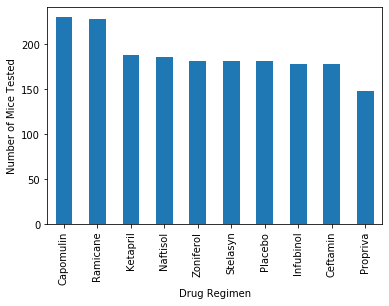

In [353]:
#Plot Drug Regimen v Count of timepoint bar chart using pandas

#Create Series

tp = df_clean.groupby(["Drug Regimen"]).count()["Timepoint"].sort_values(ascending = False)


#Plot

tpp = tp.plot(kind = "bar")

tpp.set_ylabel("Number of Mice Tested")

plt.show()

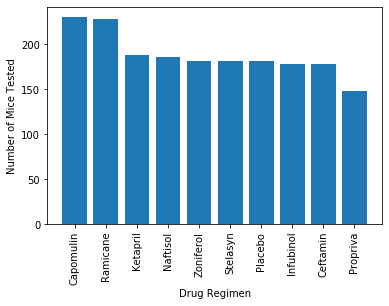

In [354]:
#Plot Drug Regimen v Count of timepoint bar chart using pyplot

#Use tp series from previous cell

x_axis = tp.index

y_axis = tp.values

#Plot

plt.bar(x_axis, y_axis)
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()


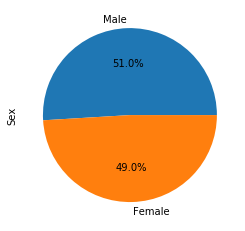

In [355]:
# Plot bar chart of distribution of male v female using pandas

sex = df_clean["Sex"].value_counts()

sd = sex.plot(kind = "pie", labels = sex.index, autopct = "%1.1f%%" )

plt.show()


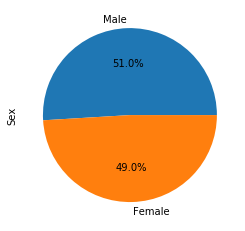

In [356]:
# Plot bar chart of distribution of male v female using pyplot

labels = sex.index
x_values = sex.values

plt.pie(x = x_values, labels = labels, autopct= "%1.1f%%")
plt.ylabel("Sex")

plt.show()


### Quartiles, Outliers and Boxplots

Calculation of the final tumor volume across the four most promising treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)

Substep 1: Create grouped DataFrame and merge to original cleaned DataFrame

In [357]:
#Find each mouse's greatest timepoint using groupby object

greatest_tp = pd.DataFrame(df_clean.groupby("Mouse ID").max()["Timepoint"])

#Rename Column
greatest_tp = greatest_tp.rename(columns = {"Timepoint" : "Greatest Timepoint"})

greatest_tp.head()

,Greatest Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [359]:
#Merge df_clean with greatest_tp 

df_clean = pd.merge(df_clean, greatest_tp, on = "Mouse ID")

In [360]:
#Preview DF

df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Greatest Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


Substep 2: Create lists that hold the treatment names as well as a second, empty list to hold the umor volume data.

In [18]:
#   Create lists of treatments and tumor volumes

#Create list for the four drug regimens
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#List of tumor volumes (will contain lists of each drug regimen's final volumes)
tumor_volumes = []

#List to store outliers
outlier_vols = []

Substep 3: Loop through each drug and locate rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.

In [19]:
#Loop through specified drug regimens to store final volumes and outliers
for regimen in drug_regimens:

    #Filter data for speciefied drug regimen and greatest time point for each mouse, and store the tumor volume column
    regimen_final_volumes  = df_clean.loc[(df_clean["Drug Regimen"] == regimen )& \
        (df_clean["Timepoint"]==df_clean["Greatest Timepoint"]), "Tumor Volume (mm3)"]

    #Calculate upper and lower bounds and IQR
    reg_lowerbound = regimen_final_volumes.quantile(0.25)
    reg_upperbound = regimen_final_volumes.quantile(0.75)
    reg_iqr = reg_upperbound - reg_lowerbound

    #Store outliers of filtered data
    outliers = regimen_final_volumes.loc[(regimen_final_volumes < reg_lowerbound - (1.5 * reg_iqr))|\
        (regimen_final_volumes > reg_upperbound + (1.5 * reg_iqr))]
    
    #append to lists
    tumor_volumes.append(list(regimen_final_volumes))
    outlier_vols.append(outliers)

    #Print results
    outlier_vol_index = drug_regimens.index(regimen)
    print(f"{regimen}'s potential outliers: {outlier_vols[outlier_vol_index]}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


- Note: The Infubinol outlier above does not have the same index as in the starter code; this might simply be a difference in how the data was manipulated.

Boxplot Creation:

In [139]:
#Loop through drug regimens to assign dictionary with tumor volumes list

#   Dictionary
drug_dict = {}

for regimen in drug_regimens:

    drug_dict[regimen] = tumor_volumes[drug_regimens.index(regimen)]


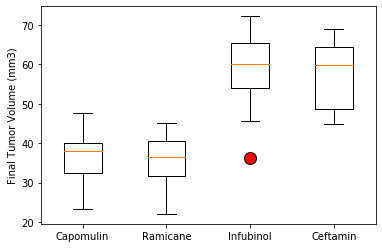

In [258]:
#       Generate box plot of the specified treatment groups (Pyplot method)

#assign parameters for arguments
flierprops = {"marker":"o","markerfacecolor":"red","markersize":"12"}


#   Plot
fig1, p1 = plt.subplots()

p1.boxplot(drug_dict.values(),flierprops= flierprops)
p1.set_xticklabels(drug_dict.keys())
p1.set_ylabel("Final Tumor Volume (mm3)")


plt.show()

(Optional Pandas method)

In [142]:
# #       Generate box plot of the specified treatment groups (Pandas method)

# #Create dataframe with dictionary
# drug_df = pd.DataFrame(drug_dict)

# #assign parameters for arguments
# flierprops = {"marker":"o","markerfacecolor":"red","markersize":"12"}
# color = {"medians":"orange","boxes":"black", "whiskers":"black", "caps":"black"}

# #   Plot

# drug_box = drug_df.plot(kind = "box", color = color,flierprops= flierprops)

# drug_box.set_ylabel("Final Tumor Volume (mm3)")

# plt.show()


### Line and Scatter Plots

Filter df for only Capomulin regimens and get data of single mouse

- Sampled until l509 was chosen to mimic results of starter code (rerunning will randomize again)

In [332]:
#filter df for only Capomulin regimens
capomulin_df = df_clean.loc[df_clean["Drug Regimen"]=="Capomulin"]

#Choose random mouse from filtered df by sampling
mouse_to_plot = capomulin_df["Mouse ID"].sample().values[0]

#filter for specified mouse
mouse_to_plot_df = capomulin_df.loc[capomulin_df["Mouse ID"]==mouse_to_plot]

print(f"Selected mouse: {mouse_to_plot}")



Selected mouse: l509


Generate a line plot of tumor volume v time point for mouse treated with Capomulin

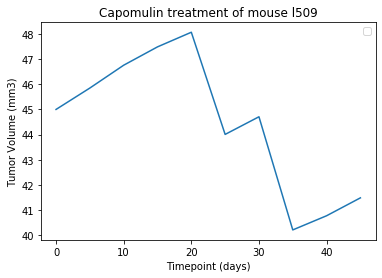

In [333]:

#Plot
title = f"Capomulin treatment of mouse {mouse_to_plot}"

mouse_line = mouse_to_plot_df.plot(kind = "line", x = "Timepoint", y= "Tumor Volume (mm3)", title = title)

mouse_line.legend("")
mouse_line.set_xlabel("Timepoint (days)")
mouse_line.set_ylabel("Tumor Volume (mm3)")

plt.show()



Generate a scatter plot of average tumor volume v mouse weight for the Capomulin regimen

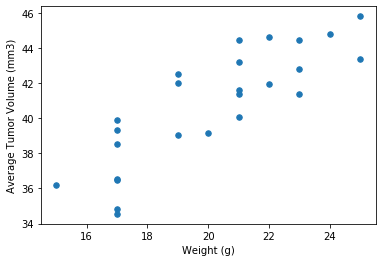

In [273]:
#Calculate average tumor volume and mouse weight
capomulin_df_averages = capomulin_df.groupby("Mouse ID").mean()

#Plot
capomulin_weight_v_tumorvol = capomulin_df_averages.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", s = 30)
capomulin_weight_v_tumorvol.set_ylabel("Average Tumor Volume (mm3)")

plt.show()

### Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


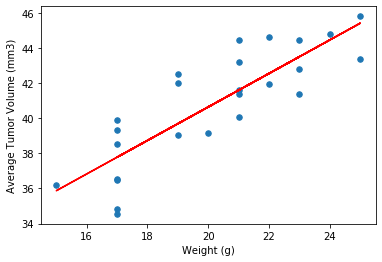

In [336]:
#   Calculate correlation coefficient and linear regression model for mouse weight and average tumor volume
x = capomulin_df_averages["Weight (g)"]
y = capomulin_df_averages["Tumor Volume (mm3)"]

#Correlation
correlation, pval = sp.pearsonr(x,y)

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = sp.linregress(x,y)

regression_line = slope*x + intercept

#   Print Correlation
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")

#   Plot

#Scatter plot
capomulin_weight_v_tumorvol = capomulin_df_averages.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", s = 30)
capomulin_weight_v_tumorvol.set_ylabel("Average Tumor Volume (mm3)")

#Regression line
plt.plot(x, regression_line, color = "red")

plt.show()

In [304]:
#Optional: print linear regression equation

print(f"y = {slope}x + {intercept}")

y = 0.9544396890241045x + 21.552160532685015
